# **Laboratorio: condiciones de un minimizador**

En esta práctica, estudiaremos las condiciones de un minimizador y las analizaremos a través de una inspección visual de algunas funciones de ejemplo.

In [2]:
# Se importan las librerías necesarias para la práctica

import numpy as np
import matplotlib.pyplot as plt

##**1. Función de prueba univariada**

La función univariada con la que trabajaremos a lo largo de esta práctica es:

##$f(x)=x^2 + 2x + 1.$

Nuestro objetivo es minimizar esta función sobre $x\in\mathbb{R}$.

Empezaremos graficando la función univariada usando un plot.

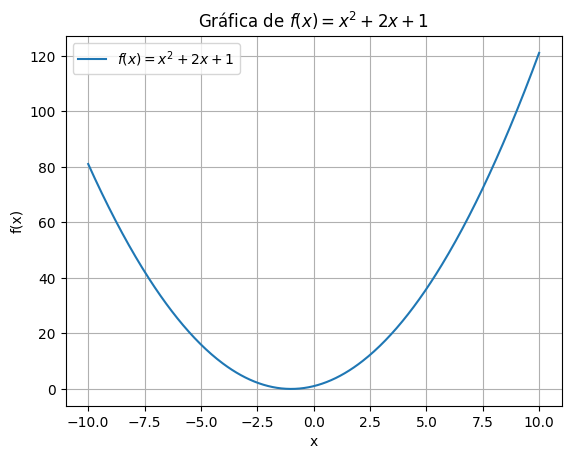

In [ ]:
def graficar_funcion(func, x_range=(-10, 10), num_points=400, title=None, xlabel=None, ylabel=None, label=None):
    # Generar datos para la gráfica
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = func(x)

    # Crear la gráfica
    plt.plot(x, y, label=label)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.grid(True)
    if label:
        plt.legend()
    plt.show()


def f(x):
    return x**2 + 2*x + 1

graficar_funcion(f, title='Gráfica de $f(x) = x^2 + 2x + 1$', xlabel='x', ylabel='f(x)', label='$f(x) = x^2 + 2x + 1$')

##**Calculo del gradiente y de la Hessiana**

Para la función univariada $f(x)=x^2 + 2x + 1$ se calcula el gradiente y la Hessiana con respecto  a $x$. Recordemos que la Hessiana $F$ es la matriz cuadrada $n \times n$ que contiene todas las posibles segundas derivadas parciales de una función $f:\mathbb{R}^n → \mathbb{R}$ que recibe como entrada un vector $x ∈ \mathbb{R}^n$. En este caso obtenemos
\begin{align}
∇f(x)&= 2x+2\\
F(x)&=2.
\end{align}


##**Evaluación de condiciones para un mínimizador**

Ahora, procederemos a evaluar un punto en nuestra función de prueba e intentar determinar si es o no un mínimizador local del problema. En este caso, vamos a verificar lo siguiente para eventualmente sacar conclusiones:
1. Gradiente en ese punto igual al vector $0$.
2. Positividad de la Hessiana evaluada en ese punto.

El punto que analizaremos es el correspondiente a $x=-1$. Como nuestra región factible es $\mathbb{R}$, este punto es un punto interior de esa región. Graficaremos este punto evaluado en la función para tener una inspección visual del comportamiento de la función alrededor de ese punto.

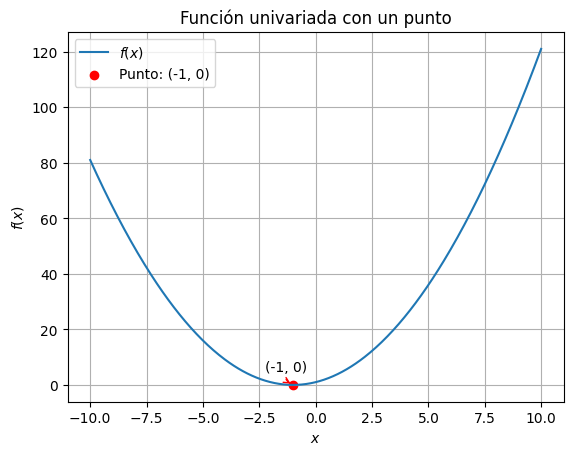

In [ ]:
def plot_univariate_function_with_points(f, x, point=None, x_range=(-10, 10), num_points=400):
    # Visualizar la función
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    f_values = [f(val) for val in x_values]
    plt.plot(x_values, f_values, label='$f(x)$')

    if point:
        plt.scatter(point[0], point[1], color='red', label=f'Punto: ({point[0]}, {point[1]})')
        plt.annotate(f'({point[0]}, {point[1]})', xy=point, xytext=(-20, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='red'))

    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Función univariada con un punto')
    plt.grid(True)
    plt.legend()
    plt.show()

def f(x):
    return x**2 + 2*x + 1

point = (-1, 0)
plot_univariate_function_with_points(f, None, point)


## **Condición necesaria de primer orden**

Recordemos que la condición necesaria de primer orden para un punto interior nos indica que un minimizador local de $f$ sobre la región factible $\Omega$ debe satisfacer que el gradiente evaluado en ese punto sea cero. Evaluando el gradiente $\nabla(x)= 2x+2$ en el punto, la evaluamos en el punto $x=-1$, verificamos si se satisface que el gradiente en ese punto es cero. Usualmente, cuando usamos esta verificación en contextos de métodos numéricos, esta verificación se hace a través de la siguiente ecuación:
\begin{align}
\|\nabla f(x)\|\le \gamma ,
\end{align}
ya que, en procesos iterativos con computaciones numéricas, es muy difícil llegar a una representación de cero. Aquí, $\gamma >0$ es un umbral que definimos, que en este ejemplo tomamos arbitrariamente como 0.1.

In [ ]:
def primer_orden(funcion, punto, umbral):
    # Evaluar la función en el punto dado
    resultado = funcion(punto)

    # Comparar el resultado con el umbral
    if 0 <= resultado <= umbral:
        print("Se cumple la condición.")
    else:
        print("No se cumple la condición.")


def funcion_ejemplo(x):
    return 2*x+2

umbral = 0.1
punto_evaluacion = -1
primer_orden(funcion_ejemplo, punto_evaluacion, umbral)


Se cumple la condición.


Podemos ver que se cumple la condición de primer orden, por lo tanto, a través de esta condición, podemos decir que el punto $x=-1$ es un candidato a mínimizador local del problema. Aquí, todavía no podemos decir con toda seguridad si es un minimizador local o no.

## **Condición necesaria de segundo orden**

Recordemos que la condición suficiente de segundo orden para un punto interior nos indica que un minimizador local de $f$ sobre la región factible $\Omega$ debe satisfacer que el gradiente evaluado en ese punto es cero y la Hessiana evaluada en ese punto es positiva definida. Ahora procederemos a usar la Hessiana calculada anteriormente $F(x)= 2$ para evaluar la condición de segundo orden. Para ello utilizaremos la siguiente función:

In [ ]:
def segundo_orden(funcion, punto):
    # Evaluar la función en el punto dado
    resultado = funcion(punto)

    # Determinar si la función es positiva o negativa en el punto
    if resultado > 0:
        print(f"La función en el punto {punto} es positiva.")
    elif resultado < 0:
        print(f"La función en el punto {punto} es negativa.")
    else:
        print(f"La función en el punto {punto} es igual a 0.")

# Ejemplo de uso
def funcion_ejemplo(x):
    return 2

punto_evaluacion = -1
segundo_orden(funcion_ejemplo, punto_evaluacion)

La función en el punto -1 es positiva.


Podemos ver que la condición de segundo orden también se cumple, por lo tanto, el punto $x=-1$ es un mínimo local. Esto puede verificarse por inspección visual también en la gráfica del punto.

## **Ejercicio**
Utilizando los códigos de ejemplo evalúe los puntos $x=-2$, $x=1$, $x=2$, grafíquelos y concluya si son: candidatos a minimizador, o minimizadores locales del problema, definitivamente no son minimizadores.


##**2. Función de prueba Multivariada**

La función multivariada con la que trabajaremos a lo largo de esta práctica es:

## $f(x) = \sin(x_1) + \cos(x_2)$

donde $x=[x_1,x_2]^T$. Queremos minimizar $f(x)$ sujeto a $x\in\Omega=\mathbb{R}^2$.  

Empezaremos graficando la función multivariada a través del siguiente plot interactivo.

In [3]:
import plotly.graph_objects as go
def multivariate_function(x1, x2):
    return np.sin(x1) + np.cos(x2)

def plot_multivariate_surface():
    x_vals = np.linspace(-5, 5, 100)
    y_vals = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = multivariate_function(X, Y)

    fig = go.Figure()
    fig.add_trace(go.Surface(x=X, y=Y, z=Z, colorscale='Viridis', opacity=0.8))
    fig.update_layout(scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='f(x1, x2)'),
                      title='Función multivariada')
    fig.show()

plot_multivariate_surface()


##**Cálculo del gradiente y la Hessiana**

Para calcular el gradiente, vamos a hallar las derivadas parciales de $f$ con respecto a $x_1$ y $x_2$:

$ \dfrac{∂f}{∂x_1}(x)= cos(x_1) $

$ \dfrac{∂f}{∂x_2}(x)= -sin(x_2) $


Siendo el gradiente:


\begin{align}
∇f(x)=
 \begin{pmatrix}
  cos(x_1)\\
  -sin(x_2)\\
\end{pmatrix}
 \end{align}

Después, vamos a hallar las segundas derivadas parciales, que corresponden a los elementos de la matriz Hessiana:

\begin{align}
\dfrac{∂^2f}{∂x_1^2}(x)&=& -sin(x_1)\\
\dfrac{∂^2f}{∂x_1x_2}(x)&=&0 \\
\dfrac{∂^2f}{∂x_2^2}(x)&=& -cos(x_2)\\
\end{align}


Lo que da como resultado la siguiente matriz Hessiana:

\begin{align}
F(x)=
 \begin{pmatrix}
  -sin(x_1)& 0\\
 0 & -cos(x_2) \\
\end{pmatrix}
 \end{align}

##**Evaluación de condiciones para un mínimizador**

Ahora, procederemos a evaluar un punto en nuestra función de prueba e intentar determinar si es o no un mínimizador local del problema. En este caso, vamos a verificar lo siguiente para eventualmente sacar conclusiones:
1. Gradiente en ese punto igual al vector $0$.
2. Positividad de la Hessiana evaluada en ese punto.

El punto que analizaremos es el correspondiente a $x_1=1.5707963267948966$ Y $x_2=0$. Tendremos un plot interactivo para realizar una inspección visual del comportamiento de la función alrededor de ese punto:

In [4]:
def plot_point_on_surface(funcion, punto):
    # Obtener los valores de la función en el punto dado
    z = funcion(punto[0], punto[1])

    # Crear la figura
    fig = go.Figure()

    # Agregar la superficie de la función
    x1_vals = np.linspace(-5, 5, 100)
    x2_vals = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Z = multivariate_function(X1, X2)
    fig.add_trace(go.Surface(x=X1, y=X2, z=Z, colorscale='Viridis', opacity=0.8))

    # Agregar el punto
    fig.add_trace(go.Scatter3d(x=[punto[0]], y=[punto[1]], z=[z], mode='markers', marker=dict(size=5, color='red'),
                               name=f'Punto ({punto[0]:.2f}, {punto[1]:.2f})'))

    # Configurar el diseño
    fig.update_layout(scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='f(x1, x2)'),
                      title='Función multivariada con punto')

    # Mostrar la figura
    fig.show()

# Ejemplo de uso
punto = (1.5707963267948966, 0)
plot_point_on_surface(multivariate_function, punto)

## **Condición necearia de primer orden**

Con el siguiente código vamos a verificar si el gradiente es aproximadamente cero, es decir, $\|\nabla f(x)\|\le \gamma$. En este caso, elegimos $\gamma=1\times 10^{-6}$:

In [5]:
def prueba_gradiente(gradiente, punto, umbral=1e-6):
    norma_gradiente = np.linalg.norm(gradiente)

    # Verificar si la norma del gradiente está dentro del umbral de tolerancia
    if norma_gradiente < umbral:
        print("La condición de primer orden se cumple.")
    else:
        print("La condición de primer orden no se cumple.")

gradiente = np.array([np.cos(punto[0]), -np.sin(punto[1])])

punto = np.array([1.5707963267948966, 0])

prueba_gradiente(gradiente, punto)

La condición de primer orden se cumple.


Podemos ver que para el punto $(x_1,x_2)=[1.5707963267948966, 0]$ el gradiente se aproxima a cero. Por lo tanto, podemos decir que es un candidato a mínimizador. Aquí, todavía no podemos decir con seguridad si es un minimizador local del problema o no.

## **Condición suficiente de segundo orden**

Procederemos a evaluar la condición de segundo orden para la función y su Hessiana calculada anteriormente
\begin{align}
F(x)=
 \begin{pmatrix}
  -sin(x_1)& 0\\
 0 & -cos(x_2) \\
\end{pmatrix}
 \end{align}

In [6]:
def prueba_hessiana(hessiana, punto):
    # Evaluar los eigenvalores de la matriz hessiana
    eigenvalores = np.linalg.eigvals(hessiana)

    # Verificar si todos los eigenvalores son positivos
    if all(val > 0 for val in eigenvalores):
        print("La matriz hessiana evaluada en el punto es positiva definida.")
    else:
        print("La matriz hessiana evaluada en el punto no es positiva definida.")

punto = np.array([1.5707963267948966, 0])
hessiana = np.array([[-np.sin(punto[0]), 0],
                     [0, -np.cos(punto[1])]])
prueba_hessiana(hessiana, punto)

La matriz hessiana evaluada en el punto no es positiva definida.


Como podemos ver, a pesar de que el punto evaluado era un candidato a minimizador, no cumple con la condición de segundo orden. Por lo tanto, no podemos decir si es un minimizador o no. Si inspeccionamos visualmente la función, nos daremos cuenta que este punto se encuentra en el pico de una de las montañas de la función, confirmando que efectivamente no debería satisfacer esta condición.

## **Ejercicio**
Teniendo en cuenta el código y las funciones proporcionadas, ahora evalúe para el mismo problema de optimización los siguientes puntos y concluya si son o no mínimos y por qué. Grafique los puntos en la superficie y justifique sus conclusiones a partir de una inspección visual de la gráfica.

$x=[x_1,x_2]^T=(1.5707963267948966, 3.141592653589793)$,

$x=[x_1,x_2]^T=(1.5707963267948966, 6.283185307179586)$,

$x=[x_1,x_2]^T=(4.71238898038469, 0)$,

$x=[x_1,x_2]^T=(4.71238898038469, 3.141592653589793)$,

$x=[x_1,x_2]^T=(4.71238898038469, 6.283185307179586)$